# TUGAS 02 - ML
- Nama : Muh.Ikhsan
- NIM  : H071191049 

### Load Dataset dari Kaggle


In [80]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle.json': b'{"username":"toku404","key":"c0c9773b8a09d8b32bc6efd248ac61cf"}'}

In [81]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [82]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Import Library

In [83]:
import numpy as np
import pandas as pd
# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# Untuk Preprocessing
from sklearn import preprocessing
# Untuk KMean Clustering
from sklearn.cluster import KMeans
# Untuk kMedoid Clustering
!pip install scikit_learn-extra
from sklearn_extra.cluster import KMedoids
# Untuk Hieratchy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Untuk DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## Preprocessing *Data*

In [84]:
# Import Dataset
df = pd.read_csv("Mall_Customers.csv")
# Tampilkan 5 Data pertama
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Penjelasan Attribut
- CostumerID = ID unik yang diberikan pada pelanggan
- Gender = Jenis Kelamin Pelanggan
- Age = Usia Pelanggan
- Annual Incom = Pendapatan Tahunan Pelanggan
- Spending Score = Skor yang diberikan mall berdasarkan perilaku pelanggan dan sifat pembelanjaan

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [86]:
# Menghapus attribut yang tidak ingin digunakan
df.drop("Gender", axis=1, inplace=True)

In [88]:
# Hapus yang kosong
# inplace agar indeksnya tidak berubah
df.dropna(inplace=True)
df.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.rename(columns={'Age': 'age', "Annual Income (k$)":"annual_income","Spending Score (1-100)":"spending_score"}, inplace=True)
df.columns

Index(['CustomerID', 'age', 'annual_income', 'spending_score'], dtype='object')

In [92]:
df.shape

(200, 4)

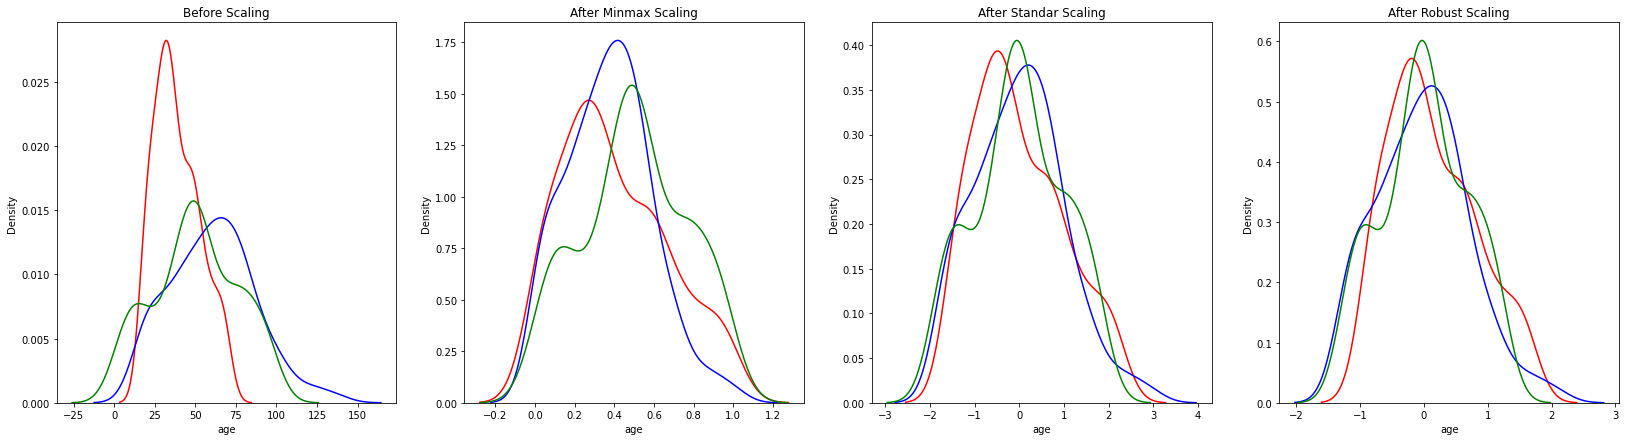

In [93]:
df_scale = df.drop("CustomerID", axis=1)

# Melakukan Minmax Scalling
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df_scale)
df_minmax = pd.DataFrame(minmax, index=df_scale.index, columns=df_scale.columns)

# Melakukan Standar Scalling
scaler = preprocessing.StandardScaler()
standar = scaler.fit_transform(df_scale)
df_standar = pd.DataFrame(standar, index=df_scale.index, columns=df_scale.columns)

# Melakukan Robust Scalling
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(df_scale)
df_robust = pd.DataFrame(robust, index=df_scale.index, columns=df_scale.columns)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(28, 7))


ax1.set_title('Before Scaling') 
sns.kdeplot(df_scale["age"], ax = ax1, color ='red')
sns.kdeplot(df_scale["annual_income"], ax = ax1, color ='blue')
sns.kdeplot(df_scale['spending_score'], ax = ax1, color ='green')


ax2.set_title('After Minmax Scaling')
sns.kdeplot(df_minmax['age'], ax = ax2, color ='red')
sns.kdeplot(df_minmax["annual_income"], ax = ax2, color ='blue')
sns.kdeplot(df_minmax['spending_score'], ax = ax2, color ='green')

ax3.set_title('After Standar Scaling')
sns.kdeplot(df_standar["age"], ax = ax3, color ='red')
sns.kdeplot(df_standar["annual_income"], ax = ax3, color ='blue')
sns.kdeplot(df_standar['spending_score'], ax = ax3, color ='green')

ax4.set_title('After Robust Scaling')
sns.kdeplot(df_robust["age"], ax = ax4, color ='red')
sns.kdeplot(df_robust["annual_income"], ax = ax4, color ='blue')
sns.kdeplot(df_robust['spending_score'], ax = ax4, color ='green')



 
plt.show()

In [94]:
# Disini saya akan menggunakan hasil scalling dengan standar
df_standar.describe() 

,age,annual_income,spending_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## A. K-Means

In [95]:
# Menyimpan hasil dalam variabel lain
df_kmeans = df_standar.copy()

In [96]:
# Menebak Berapa Cluster
# Bikin Skor dan cek satu2
scr = []
for i in range (1, 15):
  score = KMeans(n_clusters=i).fit(df_kmeans)
  scr.append(score.inertia_)
  print(score.inertia_)

599.9999999999999
389.38618895643714
295.4562449213557
205.22514747675913
168.2475801755683
133.86842085478855
117.08137586993945
104.58125604275574
93.03539426669136
81.96348333376193
72.43682526921212
67.71261478107435
64.38566737088817
59.46005652008891


Text(0, 0.5, 'Inertia')

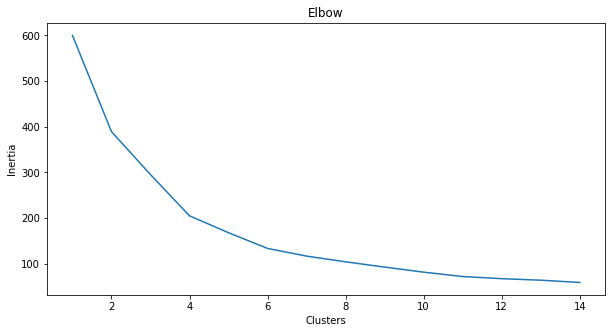

In [97]:
# tampilkan plot
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=list(range(1,15)), y=scr, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [98]:
# Melatih Model
# Membuat model dengan jumlah cluster n=5
model_kmeans = KMeans(n_clusters=6) 

# Train Model
model_kmeans.fit(df_kmeans)

# Menambahkan cluster
df_kmeans["cluster"] = model_kmeans.labels_

df_kmeans

,age,annual_income,spending_score,cluster
0,-1.424569,-1.738999,-0.434801,3
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,3
4,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,0
198,-0.491602,2.917671,-1.250054,4


(array([39.,  0., 21.,  0., 45.,  0., 23.,  0., 33., 39.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

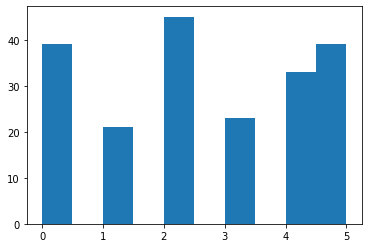

In [99]:
# Melihat histogram kluster
plt.hist(df_kmeans["cluster"])

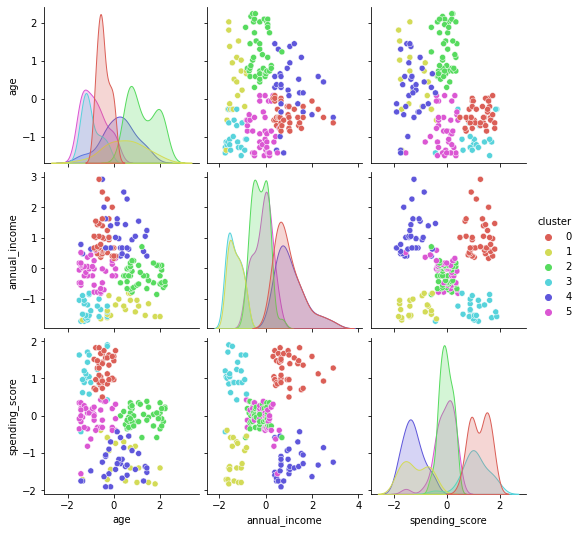

In [100]:
#analisa pairplot
sns.pairplot(df_kmeans, hue="cluster", palette=sns.color_palette('hls', n_colors=6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


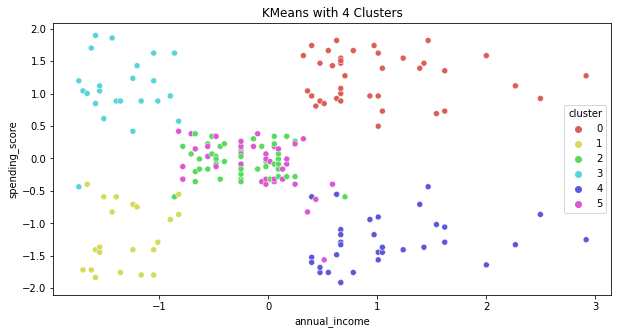

In [101]:
# Menampilkan Scatterplot 
plt.figure(figsize=(10, 5))
sns.scatterplot(df_kmeans['annual_income'], df_kmeans["spending_score"], hue=df_kmeans['cluster'], 
                palette=sns.color_palette('hls', 6))
plt.title('KMeans with 4 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


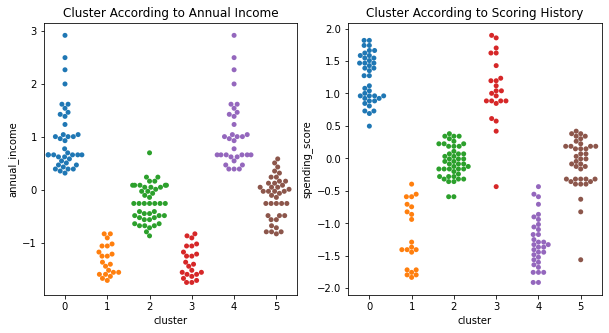

In [102]:
# Menampilkan Swarmplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
sns.swarmplot(x='cluster', y='annual_income', data=df_kmeans, ax=ax)
ax.set_title('Cluster According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='cluster', y='spending_score', data=df_kmeans, ax=ax)
ax.set_title('Cluster According to Scoring History')

plt.show()

In [103]:
df_kmeans["customer_id"] = df["CustomerID"]
df_kmeans

,age,annual_income,spending_score,cluster,customer_id
0,-1.424569,-1.738999,-0.434801,3,1
1,-1.281035,-1.738999,1.195704,3,2
2,-1.352802,-1.700830,-1.715913,1,3
3,-1.137502,-1.700830,1.040418,3,4
4,-0.563369,-1.662660,-0.395980,1,5
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,196
196,0.441365,2.497807,-0.861839,4,197
197,-0.491602,2.497807,0.923953,0,198
198,-0.491602,2.917671,-1.250054,4,199


## B. K-Medoid

In [104]:
df_kmedoids = df_standar.copy()

In [105]:
scr = []
for i in range (1, 15):
  score = KMedoids(n_clusters=i).fit(df_kmedoids)
  scr.append(score.inertia_)
  print(score.inertia_)

326.9773180385307
261.5385829117537
227.1402211425363
220.03631340866275
182.55230110918052
162.89314626487058
146.05043110011522
138.19949393606854
130.92792731790192
129.23636259230307
121.97212100992728
118.6166863237876
115.27573025477622
113.79092076470297


Text(0, 0.5, 'Inertia')

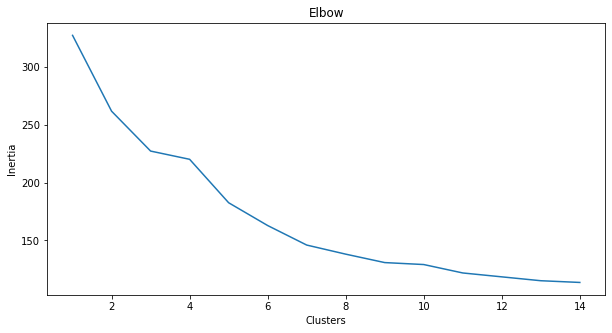

In [106]:
# tampilkan plot
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=list(range(1,15)), y=scr, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [107]:
# Lakukan Clusterisasi 5 Cluster
model_kmedoids = KMedoids(n_clusters=7, random_state=0)
model_kmedoids.fit(df_kmedoids)

# Menambagkan Cluster
df_kmedoids["cluster"] = model_kmedoids.labels_
df_kmedoids

,age,annual_income,spending_score,cluster
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,4
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,4
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,5
196,0.441365,2.497807,-0.861839,2
197,-0.491602,2.497807,0.923953,5
198,-0.491602,2.917671,-1.250054,2


(array([20., 37.,  0., 18.,  0., 17., 25.,  0., 39., 44.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

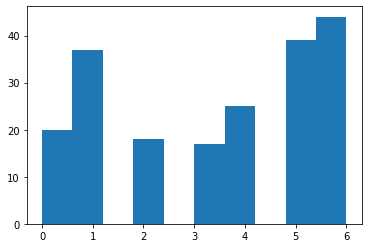

In [108]:
# Melihat histogram kluster
plt.hist(df_kmedoids["cluster"])

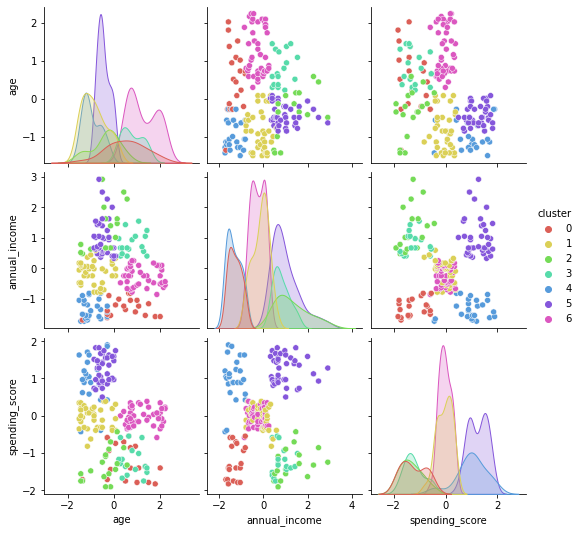

In [109]:
#analisa pairplot
sns.pairplot(df_kmedoids, hue="cluster", palette=sns.color_palette('hls', n_colors=7))

In [110]:
# Menambahkan Label
df_kmedoids["customer_id"] = df["CustomerID"]
df_kmedoids

,age,annual_income,spending_score,cluster,customer_id
0,-1.424569,-1.738999,-0.434801,4,1
1,-1.281035,-1.738999,1.195704,4,2
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,4,4
4,-0.563369,-1.662660,-0.395980,4,5
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,5,196
196,0.441365,2.497807,-0.861839,2,197
197,-0.491602,2.497807,0.923953,5,198
198,-0.491602,2.917671,-1.250054,2,199


## C. Hierarchy

In [111]:
df_hi = df_standar.copy()

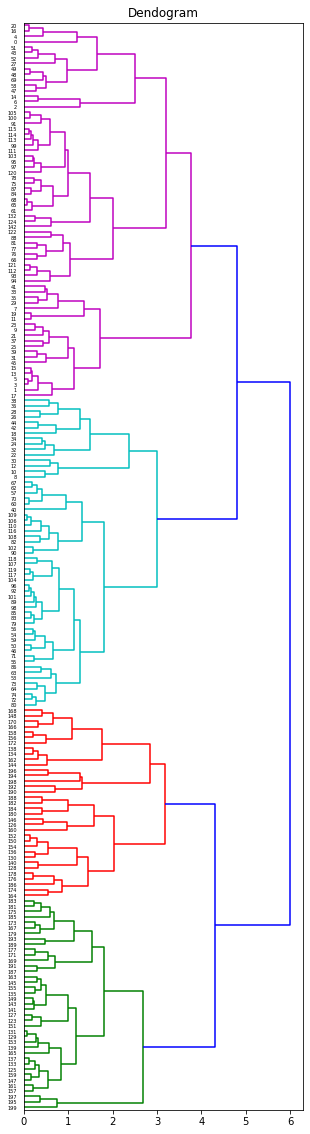

In [112]:
fig = plt.figure

mergings_single = sch.linkage(df_hi, method="complete")
fig, ax = plt.subplots(figsize=(5,20))
dn1 = sch.dendrogram(mergings_single, ax=ax, leaf_rotation=0, orientation='right')
plt.title("Dendogram")
plt.show()

In [113]:
model_agglo = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
model_agglo.fit(df_hi)

# Menambagkan Cluster
df_hi["cluster"] = model_agglo.labels_
df_hi

,age,annual_income,spending_score,cluster
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,3
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,3
198,-0.491602,2.917671,-1.250054,1


(array([69.,  0.,  0., 35.,  0.,  0., 57.,  0.,  0., 39.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

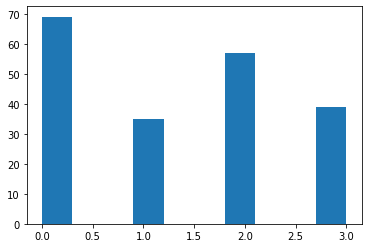

In [114]:
# Melihat histogram kluster
plt.hist(df_hi["cluster"])

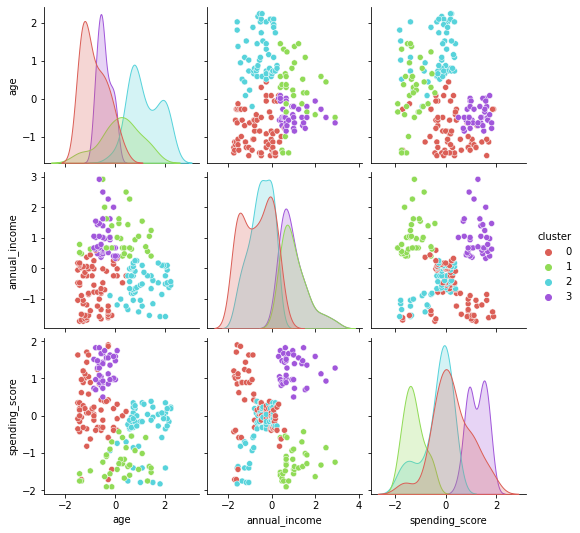

In [115]:
#analisa pairplot
sns.pairplot(df_hi, hue="cluster", palette=sns.color_palette('hls', n_colors=4))

In [116]:
# Menambahkan Label
df_hi["customer_id"] = df["CustomerID"]
df_hi

,age,annual_income,spending_score,cluster,customer_id
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,2
2,-1.352802,-1.700830,-1.715913,0,3
3,-1.137502,-1.700830,1.040418,0,4
4,-0.563369,-1.662660,-0.395980,0,5
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,3,196
196,0.441365,2.497807,-0.861839,1,197
197,-0.491602,2.497807,0.923953,3,198
198,-0.491602,2.917671,-1.250054,1,199


## D. DBSCAN


In [117]:
df_dbscan = df_standar.copy()

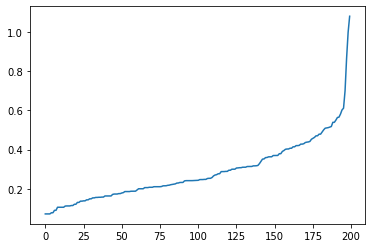

In [118]:
# Menghitung jarak rata-rata antara setiap titik dan k tetangga terdekatnya (eps)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_dbscan)
distances, indices = neighbors_fit.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [119]:
model_dbscan = DBSCAN(min_samples=4, eps=0.65)
model_dbscan.fit(df_dbscan)

# Menambagkan Cluster
df_dbscan["cluster"] = model_dbscan.labels_
df_dbscan

,age,annual_income,spending_score,cluster
0,-1.424569,-1.738999,-0.434801,-1
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,-1
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-1
196,0.441365,2.497807,-0.861839,-1
197,-0.491602,2.497807,0.923953,-1
198,-0.491602,2.917671,-1.250054,-1


(array([ 14.,   0.,   0., 146.,   0.,   0.,  36.,   0.,   0.,   4.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

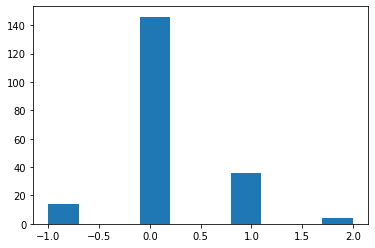

In [120]:
# Melihat histogram kluster
plt.hist(df_dbscan["cluster"])

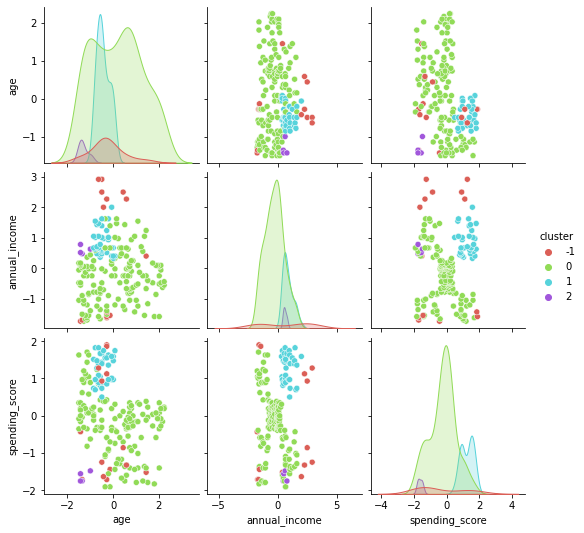

In [121]:
#analisa pairplot
sns.pairplot(df_dbscan, hue="cluster", palette=sns.color_palette('hls', n_colors=4))

## Perbandingan Hasil Clusterisasi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'K-Means Clustering')

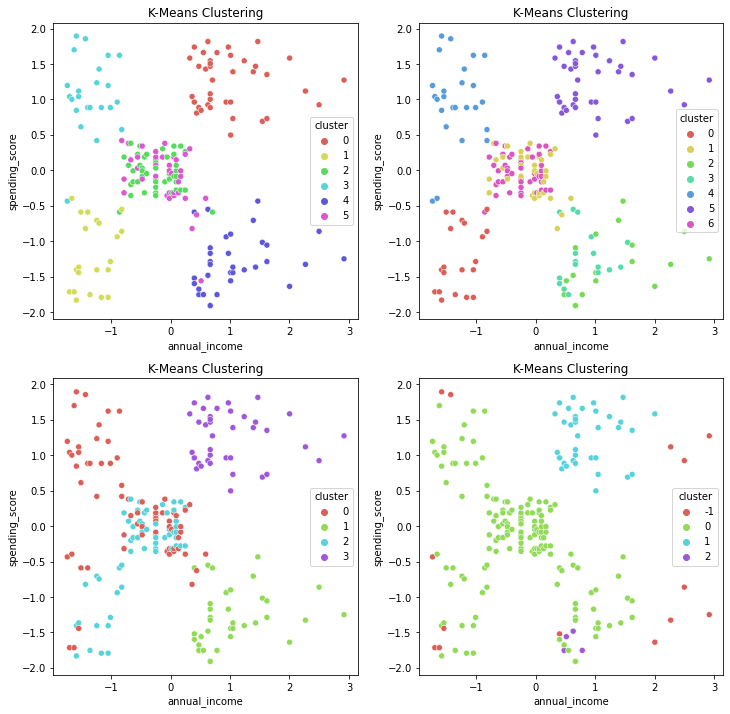

In [122]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.scatterplot(df_kmeans['annual_income'], df_kmeans['spending_score'], hue=df_kmeans['cluster'], palette=sns.color_palette('hls',6),ax=ax[0][0])
ax[0][0].set_title("K-Means Clustering")

sns.scatterplot(df_kmedoids['annual_income'], df_kmedoids['spending_score'], hue=df_kmedoids['cluster'], palette=sns.color_palette('hls',7),ax=ax[0][1])
ax[0][1].set_title("K-Means Clustering")

sns.scatterplot(df_hi['annual_income'], df_hi['spending_score'], hue=df_hi['cluster'], palette=sns.color_palette('hls',4),ax=ax[1][0])
ax[1][0].set_title("K-Means Clustering")

sns.scatterplot(df_dbscan['annual_income'], df_dbscan['spending_score'], hue=df_dbscan['cluster'], palette=sns.color_palette('hls',4),ax=ax[1][1])
ax[1][1].set_title("K-Means Clustering")


